In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
class Kmeans:
  def __init__(self, X, num):
    self.K= num
    self.interation= 100
    self.examples, self.features= X.shape

  def random_centeroid(self, X):
    centroids= np.zeros((self.K, self.features)) 
    for k in range(self.K):
      centroid = X[np.random. choice(range(self.examples))] 
      centroids[k]= centroid
    return centroids

  def cluster(self, X, centroids):
    clusters= [[] for _ in range(self.K)]
    for index, point in enumerate(X):
      closet= np.argmin(
        np.sqrt(np.sum((point-centroids)**2, axis=1))) 
      clusters[closet].append(index)
    return clusters

  def new_centroid(self, cluster, X):
    centroids = np.zeros((self.K, self.features))
    for index, cluster in enumerate(cluster):
      new_centroid = np.mean (X[cluster], axis=0) 
      centroids[index] = new_centroid
    return centroids

  def predict(self, clusters, X): 
    y_pred = np.zeros(self.examples)
    for index, cluster in enumerate(clusters):
      for sample_index in cluster: 
        y_pred [sample_index] = index
    return y_pred

  def plot_fig(self, x, y): 
    plt.scatter (X[:, 0], X[:, 1], color='deeppink')

  def fit(self, x):
    centroids= self.random_centeroid(X) 
    for _ in range(self.interation):
      clusters = self.cluster (X, centroids) 
      prev = centroids
      centroids= self.new_centroid (clusters, X) 
      diff= centroids - prev

      if not diff.any():
        print('centeroids:', centroids) 
        break

    y_pred= self.predict(clusters, X)
    print('Which cluster each point belongs: ',y_pred)

    self.plot_fig(X, centroids)

In [3]:
X, _ = make_blobs (n_samples=100, n_features=2, centers=3)
print('Inputs: ', X)


Inputs:  [[10.04020699  1.25779638]
 [10.24051699 -1.47937099]
 [ 6.33732262 -8.95011096]
 [ 8.10635497 -1.16171058]
 [ 9.91251403 -0.39906277]
 [-4.34109689  4.14270204]
 [ 9.44891377 -1.44232744]
 [-4.08341013  5.90836399]
 [ 9.81727034 -0.59318759]
 [ 8.5414954  -7.70831807]
 [ 7.45271766 -7.27090497]
 [ 8.21560394 -6.04098962]
 [-5.29111245  4.95020405]
 [ 8.63551184 -0.02118863]
 [10.27088925  0.17105105]
 [ 8.91066211 -6.27441821]
 [-5.0274327   6.37319333]
 [ 9.25913628 -7.86935697]
 [-6.65915176  4.96347028]
 [10.13508352  0.75294811]
 [ 9.00268478 -7.3526737 ]
 [10.91103813  1.05564447]
 [-4.33661208  3.27828159]
 [ 9.7680807  -1.77676316]
 [-3.44878448  5.887863  ]
 [11.34566109 -0.37734468]
 [10.78116064  0.33528297]
 [-6.32825882  5.58099779]
 [-4.29851519  4.03922415]
 [ 9.69244712 -0.19442438]
 [-3.08877751  6.00804736]
 [-4.61229634  5.3087659 ]
 [ 8.26937661 -6.94719572]
 [-2.92105159  5.10813228]
 [ 7.95026243 -7.90927629]
 [-5.12390905  6.1872075 ]
 [ 7.64780151 -6.91

centeroids: [[ 9.76955653 -0.02375   ]
 [ 8.23413656 -7.46549731]
 [-4.67571893  4.9251938 ]]
Which cluster each point belongs:  [0. 0. 1. 0. 0. 2. 0. 2. 0. 1. 1. 1. 2. 0. 0. 1. 2. 1. 2. 0. 1. 0. 2. 0.
 2. 0. 0. 2. 2. 0. 2. 2. 1. 2. 1. 2. 1. 1. 1. 2. 2. 0. 2. 0. 0. 2. 0. 1.
 1. 2. 1. 0. 0. 0. 0. 2. 2. 0. 2. 2. 0. 2. 1. 1. 0. 1. 1. 0. 2. 2. 1. 1.
 2. 1. 0. 1. 1. 0. 2. 1. 1. 2. 1. 0. 2. 0. 0. 1. 1. 0. 1. 0. 2. 2. 2. 2.
 1. 1. 1. 0.]


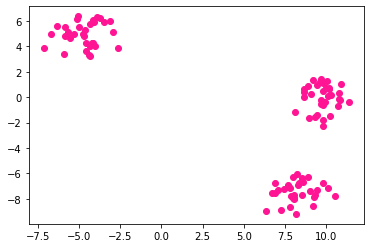

In [4]:
kmeans = Kmeans(X, 3)
kmeans.fit(X)